In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

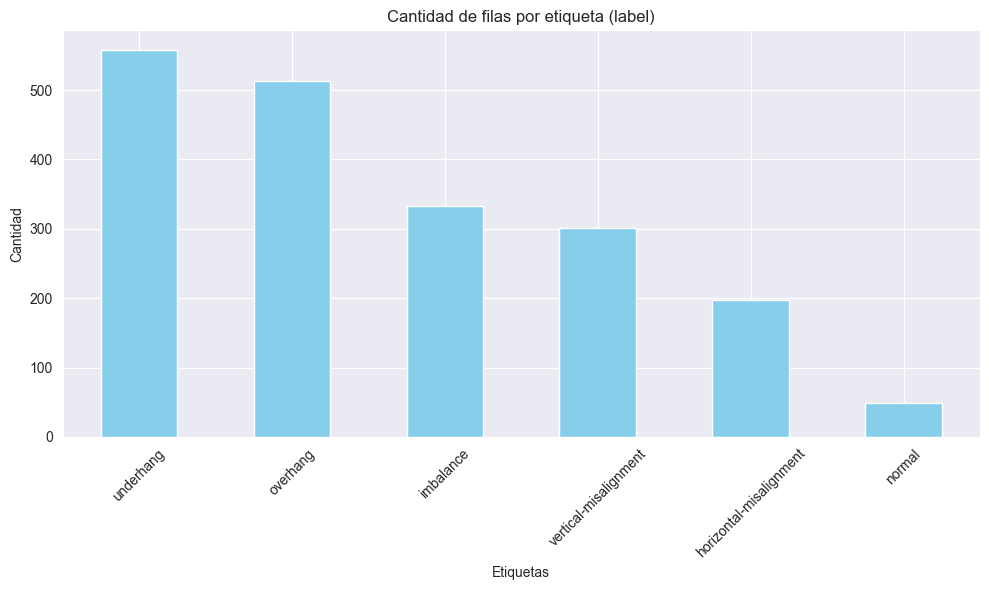

In [26]:
import seaborn as sns

ruta_csv = 'combined_statistics_full_sobregrupos.csv'
df = pd.read_csv(ruta_csv)

conteo_labels = df['label'].value_counts()

# Crear el gráfico
plt.figure(figsize=(10, 6))
conteo_labels.plot(kind='bar', color='skyblue')
plt.title('Cantidad de filas por etiqueta (label)')
plt.xlabel('Etiquetas')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

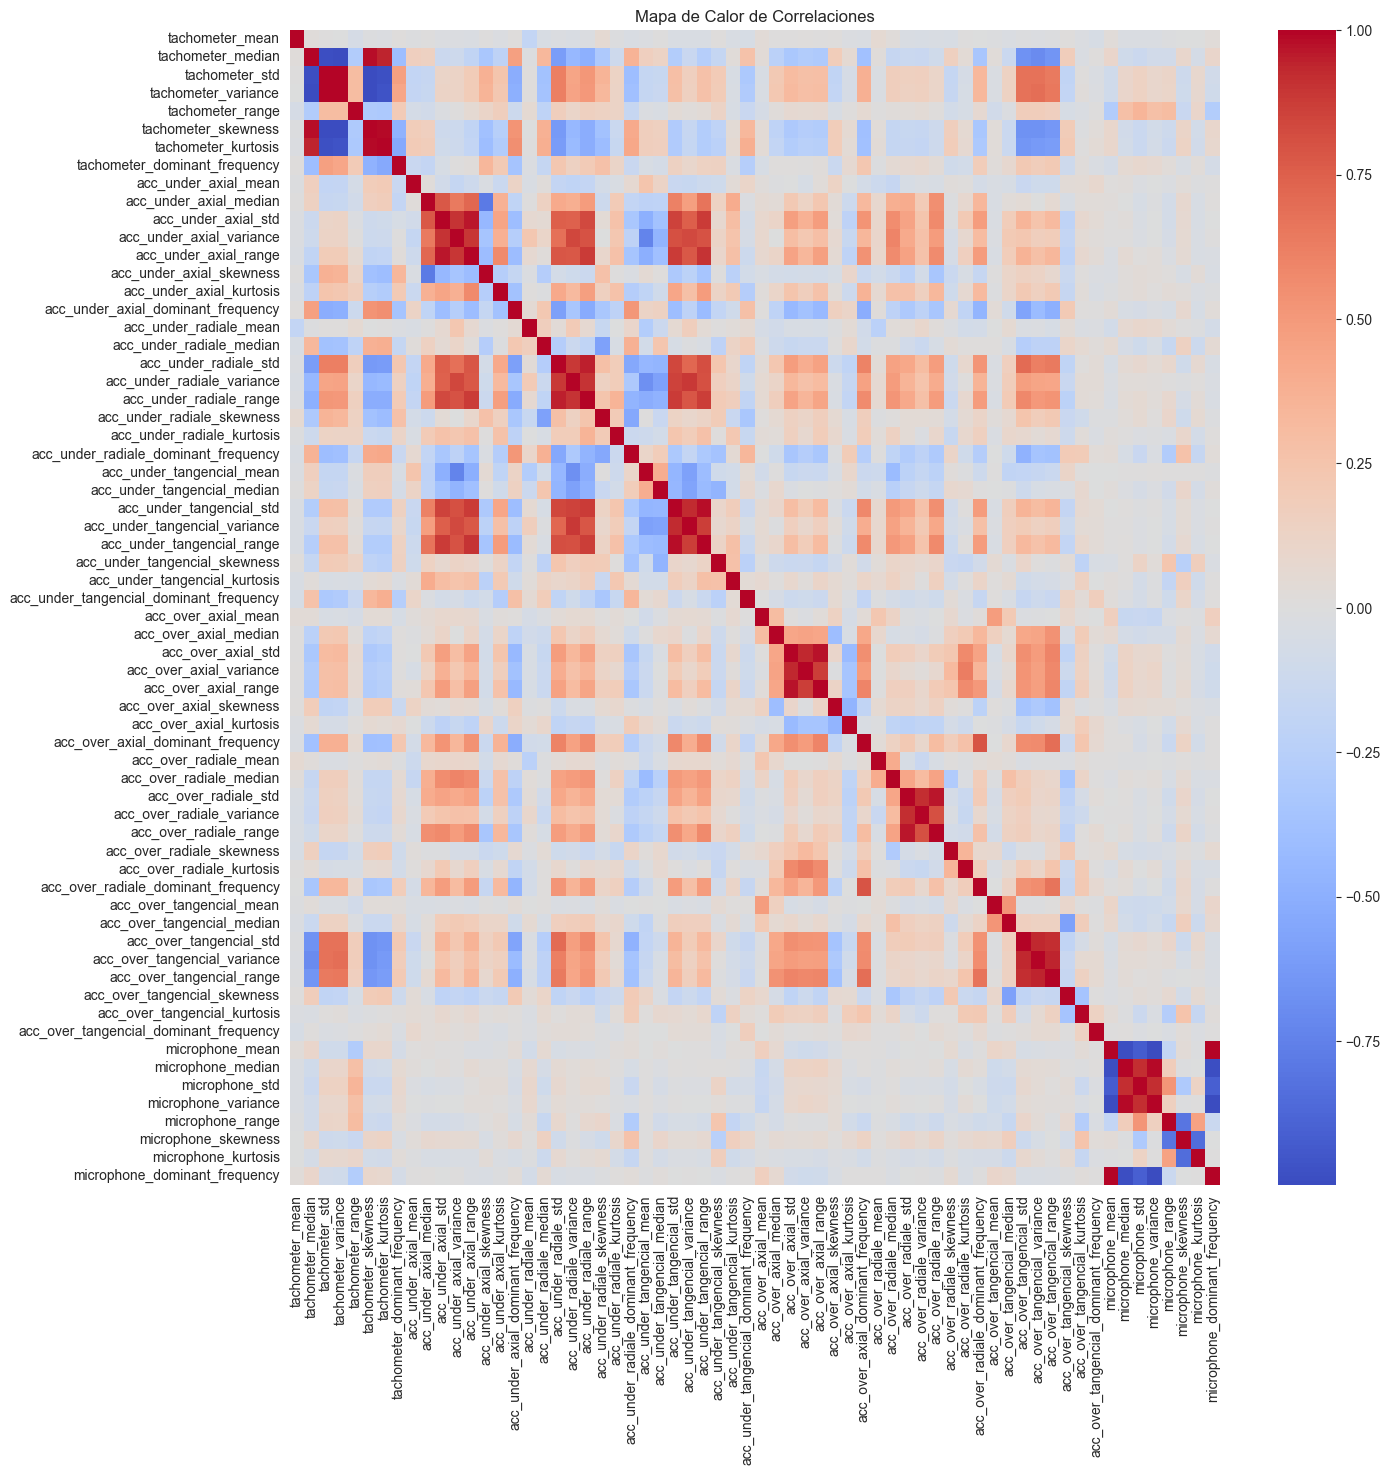


Highly correlated feature pairs (|correlation| > 0.9):
tachometer_median & tachometer_std: -0.986
tachometer_median & tachometer_variance: -0.994
tachometer_median & tachometer_skewness: 0.982
tachometer_median & tachometer_kurtosis: 0.940
tachometer_std & tachometer_variance: 0.998
tachometer_std & tachometer_skewness: -0.999
tachometer_std & tachometer_kurtosis: -0.983
tachometer_variance & tachometer_skewness: -0.995
tachometer_variance & tachometer_kurtosis: -0.968
tachometer_skewness & tachometer_kurtosis: 0.988
acc_under_axial_std & acc_under_axial_variance: 0.900
acc_under_axial_std & acc_under_axial_range: 0.967
acc_under_axial_range & acc_under_tangencial_range: 0.901
acc_under_radiale_std & acc_under_radiale_range: 0.948
acc_under_radiale_variance & acc_under_radiale_range: 0.901
acc_under_tangencial_std & acc_under_tangencial_variance: 0.924
acc_under_tangencial_std & acc_under_tangencial_range: 0.979
acc_over_axial_std & acc_over_axial_variance: 0.934
acc_over_axial_std & 

In [10]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

correlaciones = X.corr()

plt.figure(figsize=(15, 15))

sns.heatmap(correlaciones, annot=False, cmap='coolwarm', cbar=True)

plt.title('Mapa de Calor de Correlaciones')
plt.show()

print("\nHighly correlated feature pairs (|correlation| > 0.9):")
high_corr = np.where(np.abs(correlaciones) > 0.9)

for i, j in zip(*high_corr):
    if i < j:
        print(f"{correlaciones.index[i]} & {correlaciones.columns[j]}: {correlaciones.iloc[i, j]:.3f}")

In [11]:
correlaciones_desordenadas = correlaciones.unstack()
correlaciones_ordenadas = correlaciones_desordenadas.abs().sort_values(ascending=False)

correlaciones_filtradas = correlaciones_ordenadas[
    correlaciones_ordenadas.index.get_level_values(0) != correlaciones_ordenadas.index.get_level_values(1)]

print("Correlaciones más fuertes:")
print(len(correlaciones_filtradas))
print(correlaciones_filtradas.head(4032))

Correlaciones más fuertes:
4032
microphone_variance                   microphone_dominant_frequency           0.999335
microphone_dominant_frequency         microphone_variance                     0.999335
microphone_variance                   microphone_mean                         0.999306
microphone_mean                       microphone_variance                     0.999306
tachometer_std                        tachometer_skewness                     0.999137
                                                                                ...   
acc_over_tangencial_mean              acc_under_radiale_mean                  0.000270
microphone_dominant_frequency         microphone_skewness                     0.000167
microphone_skewness                   microphone_dominant_frequency           0.000167
acc_under_radiale_dominant_frequency  acc_over_axial_mean                     0.000148
acc_over_axial_mean                   acc_under_radiale_dominant_frequency    0.000148
Length: 403

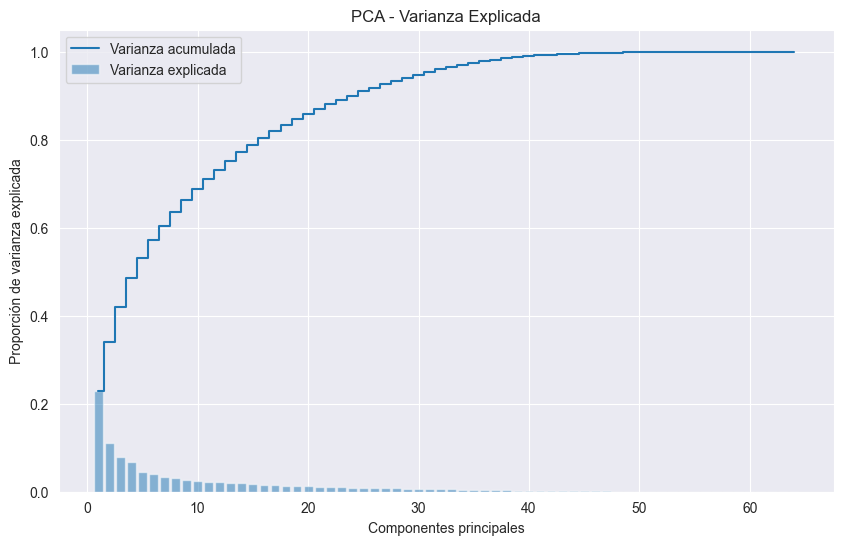

Varianza explicada por componente:
Componente 1: 0.2289
Componente 2: 0.1106
Componente 3: 0.0796
Componente 4: 0.0676
Componente 5: 0.0449
Componente 6: 0.0398
Componente 7: 0.0333
Componente 8: 0.0306
Componente 9: 0.0276
Componente 10: 0.0247
Componente 11: 0.0225
Componente 12: 0.0220
Componente 13: 0.0201
Componente 14: 0.0193
Componente 15: 0.0175
Componente 16: 0.0156
Componente 17: 0.0146
Componente 18: 0.0140
Componente 19: 0.0133
Componente 20: 0.0124
Componente 21: 0.0113
Componente 22: 0.0109
Componente 23: 0.0101
Componente 24: 0.0095
Componente 25: 0.0093
Componente 26: 0.0084
Componente 27: 0.0083
Componente 28: 0.0079
Componente 29: 0.0071
Componente 30: 0.0067
Componente 31: 0.0062
Componente 32: 0.0056
Componente 33: 0.0053
Componente 34: 0.0048
Componente 35: 0.0045
Componente 36: 0.0040
Componente 37: 0.0037
Componente 38: 0.0030
Componente 39: 0.0025
Componente 40: 0.0021
Componente 41: 0.0020
Componente 42: 0.0014
Componente 43: 0.0013
Componente 44: 0.0010
Compon

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ruta_csv = 'combined_statistics.csv'
df = pd.read_csv(ruta_csv)

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada, alpha=0.5, align='center',
        label='Varianza explicada')
plt.step(range(1, len(varianza_acumulada) + 1), varianza_acumulada, where='mid', label='Varianza acumulada')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.title('PCA - Varianza Explicada')
plt.legend(loc='best')
plt.show()

print("Varianza explicada por componente:")
for i, var in enumerate(varianza_explicada, start=1):
    print(f"Componente {i}: {var:.4f}")

n_componentes_optimos = np.argmax(varianza_acumulada >= 0.9) + 1
print(f"\nNúmero óptimo de componentes para capturar el 90% de la varianza: {n_componentes_optimos}")

pca_optimo = PCA(n_components=n_componentes_optimos)
X_reducido = pca_optimo.fit_transform(X_scaled)

print(f"Conjunto de datos reducido a {n_componentes_optimos} componentes principales.")
correlation_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()

In [13]:

# Obtener la matriz de componentes
loadings = pca.components_

# Crear un DataFrame para visualizar las contribuciones
loadings_df = pd.DataFrame(loadings, columns=X.columns)
loadings_df.head(20)
# Filtrar las cargas con valor absoluto mayor que 0.4
filtered_loadings = loadings_df.applymap(lambda x: x if abs(x) > 0.2 else None)

# Imprimir las variables que cumplen la condición
for i in range(20):  # Iterar sobre las primeras 19 componentes
    print(f"Componente Principal {i + 1}:")
    print(filtered_loadings.loc[i].dropna())
    print("\n")
# Lista para almacenar los nombres de las variables con alta contribución
variables_importantes = []

# Filtrar las cargas con valor absoluto mayor que 0.4 y acumular los nombres de las variables
for i in range(20):  # Iterar sobre las primeras 19 componentes
    print(f"Componente Principal {i + 1}:")
    high_contrib = loadings_df.loc[i].abs().sort_values(ascending=False).head(4)
    print(high_contrib)
    print("\n")

    # Agregar a la lista solo si no está ya en la lista
    for variable in high_contrib.index:
        if variable not in variables_importantes:
            variables_importantes.append(variable)

# Mostrar todas las variables que tuvieron una alta contribución
print("Variables con alta contribución en las primeras 19 componentes principales:")
print(variables_importantes)
print(len(variables_importantes))

Componente Principal 1:
acc_under_axial_std           0.201189
acc_under_axial_range         0.211424
acc_under_radiale_std         0.248544
acc_under_radiale_variance    0.216465
acc_under_radiale_range       0.242933
acc_under_tangencial_std      0.212244
acc_under_tangencial_range    0.209408
Name: 0, dtype: float64


Componente Principal 2:
tachometer_median           0.227571
tachometer_std             -0.234687
tachometer_variance        -0.232471
tachometer_skewness         0.234167
tachometer_kurtosis         0.234130
acc_under_axial_median      0.252678
acc_under_axial_std         0.209803
acc_under_axial_variance    0.217391
acc_under_axial_skewness   -0.234096
Name: 1, dtype: float64


Componente Principal 3:
microphone_mean                 -0.388357
microphone_median                0.383309
microphone_std                   0.390035
microphone_variance              0.386676
microphone_dominant_frequency   -0.383705
Name: 2, dtype: float64


Componente Principal 4:
acc_under_

C:\Users\hodei\AppData\Local\Temp\ipykernel_2360\1286720932.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_loadings = loadings_df.applymap(lambda x: x if abs(x) > 0.2 else None)


Aunque algunas columnas son más relevantes para algún componente, puede que haya columnas que aunque no estén en el top 5 de importancia para ese componente, tenga un valor relativamente importante para muchos componentes, por lo que este camino será rechazada. Ahora aplicaremos el modelo de aprendizaje supervisado para clasificación.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#stratify --> para que cada y se divida en 80% 20%


# Hiperparámetros para Random Forest
rf_param_grid = {
    'n_estimators': range(50, 200, 10),
    'max_depth': range(1,30,2),
    'min_samples_split': range(2,60,2),
    'min_samples_leaf': range(1,60,2),
}

# GridSearchCV para encontrar los mejores hiperparámetros
print("Optimizing Random Forest...")
rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)
rf_grid_search.fit(X_train, y_train)
print(f"Best Random Forest Params: {rf_grid_search.best_params_}")

In [17]:
# Entrenamiento con los mejores parámetros
best_rf = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50,
                                 random_state=42)
best_rf.fit(X_train, y_train)

# Realizar predicciones y evaluación
rf_train_pred = best_rf.predict(X_train)
rf_test_pred = best_rf.predict(X_test)

print("\nClassification Report (Training):")
print(classification_report(y_train, rf_train_pred))

print("\nClassification Report (Testing):")
print(classification_report(y_test, rf_test_pred))


Classification Report (Training):
                         precision    recall  f1-score   support

horizontal-misalignment       1.00      1.00      1.00       158
              imbalance       1.00      1.00      1.00       266
                 normal       1.00      0.97      0.99        39
               overhang       1.00      1.00      1.00       410
              underhang       1.00      1.00      1.00       446
  vertical-misalignment       1.00      1.00      1.00       241

               accuracy                           1.00      1560
              macro avg       1.00      1.00      1.00      1560
           weighted avg       1.00      1.00      1.00      1560


Classification Report (Testing):
                         precision    recall  f1-score   support

horizontal-misalignment       0.97      1.00      0.99        39
              imbalance       1.00      1.00      1.00        67
                 normal       1.00      1.00      1.00        10
               ov


Feature Importance Analysis:


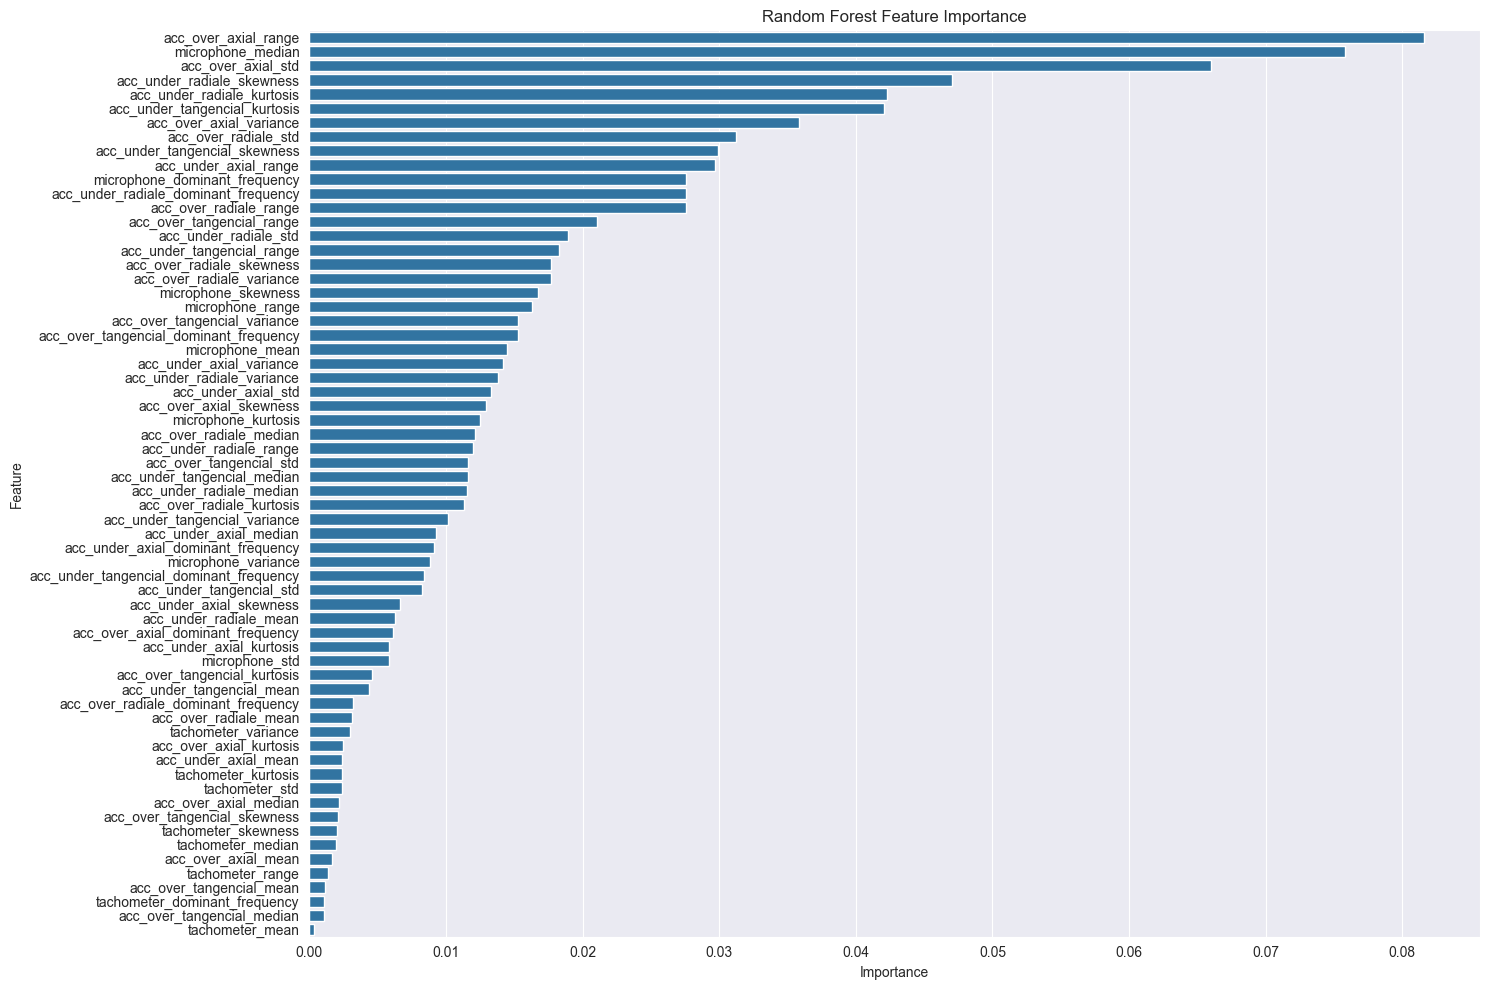


Feature Importance Ranking:
                          feature  importance
36           acc_over_axial_range    0.081609
57              microphone_median    0.075802
34             acc_over_axial_std    0.065988
21     acc_under_radiale_skewness    0.047070
22     acc_under_radiale_kurtosis    0.042287
..                            ...         ...
4                tachometer_range    0.001325
48       acc_over_tangencial_mean    0.001138
7   tachometer_dominant_frequency    0.001088
49     acc_over_tangencial_median    0.001055
0                 tachometer_mean    0.000325

[64 rows x 2 columns]


In [18]:
def plot_feature_importance(model, feature_names, title="Feature Importance"):
    """
    Plot feature importance
    """
    importances = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(15, 10))
    sns.barplot(data=importances, x='importance', y='feature')
    plt.title(title)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

    return importances


print("\nFeature Importance Analysis:")
importance_df = plot_feature_importance(best_rf, X.columns,
                                        "Random Forest Feature Importance")
print("\nFeature Importance Ranking:")
print(importance_df)

In [20]:
# Calcular la suma total de importancias
total_importance = importance_df['importance'].sum()
# print(total_importance) --> efektibamente da 1

# Seleccionar características cuya suma de importancia sea el 90% del total
cumulative_importance = importance_df['importance'].cumsum()
selected_features = importance_df[cumulative_importance <= total_importance * 0.9]

print("\nSelected Features (90% of importance):")
print(selected_features)
X = X[selected_features['feature']]
# X_scaled = StandardScaler().fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_rf.fit(X_train, y_train)

# Realizar predicciones y evaluación
rf_train_pred = best_rf.predict(X_train)
rf_test_pred = best_rf.predict(X_test)

print("\nClassification Report (Training):")
print(classification_report(y_train, rf_train_pred))

print("\nClassification Report (Testing):")
print(classification_report(y_test, rf_test_pred))


Selected Features (90% of importance):
                                   feature  importance
36                    acc_over_axial_range    0.081609
57                       microphone_median    0.075802
34                      acc_over_axial_std    0.065988
21              acc_under_radiale_skewness    0.047070
22              acc_under_radiale_kurtosis    0.042287
30           acc_under_tangencial_kurtosis    0.042063
35                 acc_over_axial_variance    0.035827
42                    acc_over_radiale_std    0.031225
29           acc_under_tangencial_skewness    0.029933
12                   acc_under_axial_range    0.029673
63           microphone_dominant_frequency    0.027602
23    acc_under_radiale_dominant_frequency    0.027597
44                  acc_over_radiale_range    0.027571
52               acc_over_tangencial_range    0.021028
18                   acc_under_radiale_std    0.018921
28              acc_under_tangencial_range    0.018260
45               acc_over

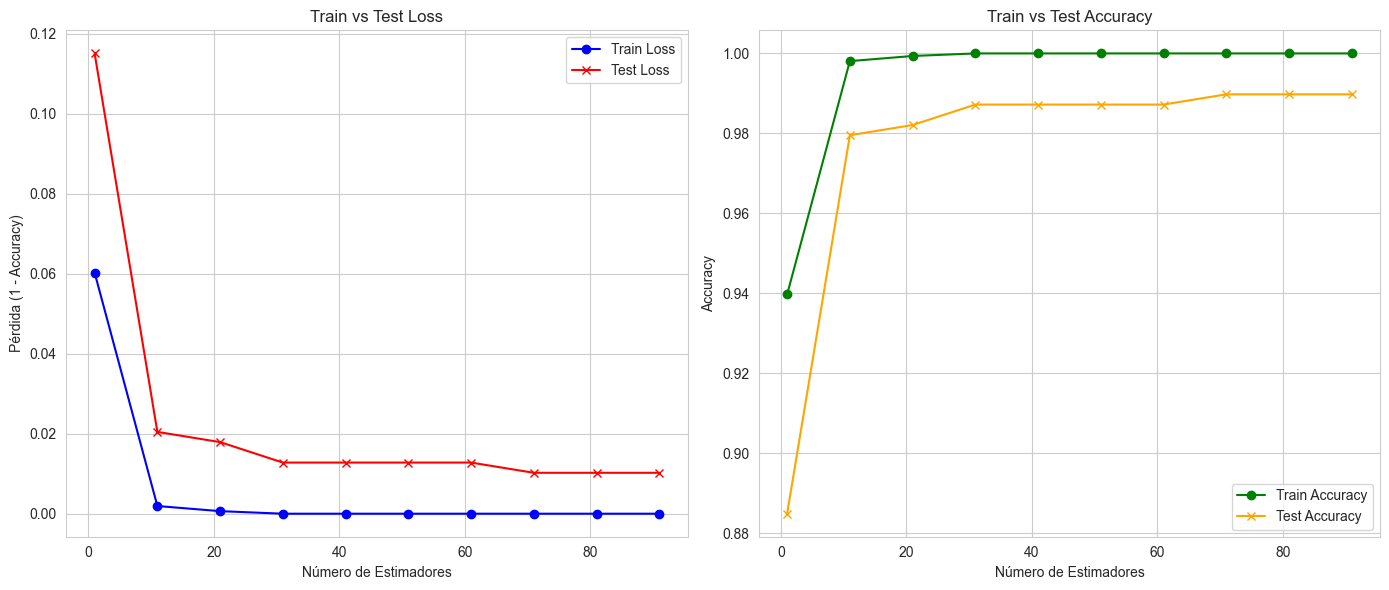

In [28]:

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

# Variar el número de estimadores y registrar métricas
for n_estimators in range(1, 101, 10):
    best_rf.set_params(n_estimators=n_estimators)
    best_rf.fit(X_train, y_train)

    # Predicciones
    train_pred = best_rf.predict(X_train)
    test_pred = best_rf.predict(X_test)

    # Calcular pérdida (1 - accuracy)
    train_loss.append(1 - accuracy_score(y_train, train_pred))
    test_loss.append(1 - accuracy_score(y_test, test_pred))

    # Calcular accuracy
    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test, test_pred))

# Graficar resultados
fig, ax1 = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Train Loss y Test Loss
ax1[0].plot(range(1, 101, 10), train_loss, label='Train Loss', color='blue', marker='o')
ax1[0].plot(range(1, 101, 10), test_loss, label='Test Loss', color='red', marker='x')
ax1[0].set_xlabel('Número de Estimadores')
ax1[0].set_ylabel('Pérdida (1 - Accuracy)')
ax1[0].set_title('Train vs Test Loss')
ax1[0].legend()

# Gráfico 2: Train Accuracy y Test Accuracy
ax1[1].plot(range(1, 101, 10), train_accuracy, label='Train Accuracy', color='green', marker='o')
ax1[1].plot(range(1, 101, 10), test_accuracy, label='Test Accuracy', color='orange', marker='x')
ax1[1].set_xlabel('Número de Estimadores')
ax1[1].set_ylabel('Accuracy')
ax1[1].set_title('Train vs Test Accuracy')
ax1[1].legend()

plt.tight_layout()
plt.show()

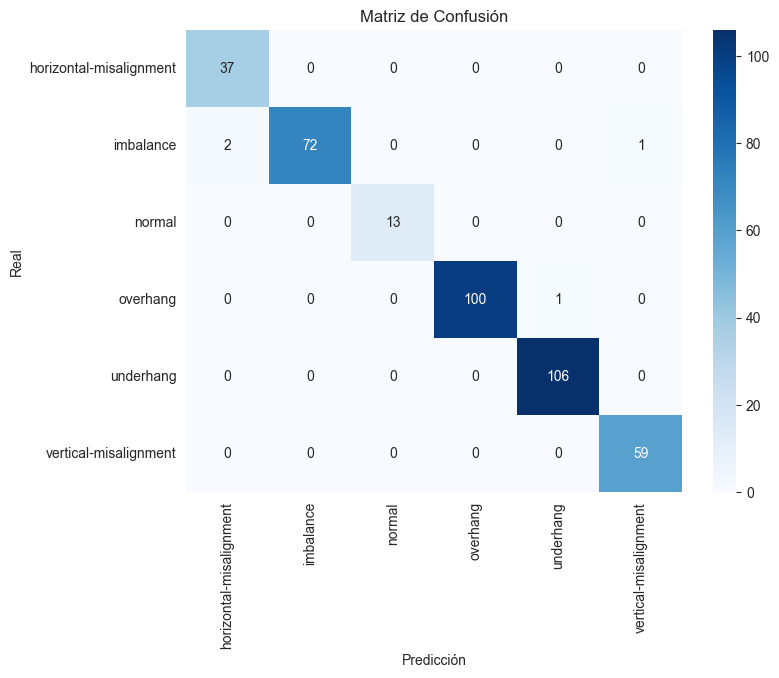

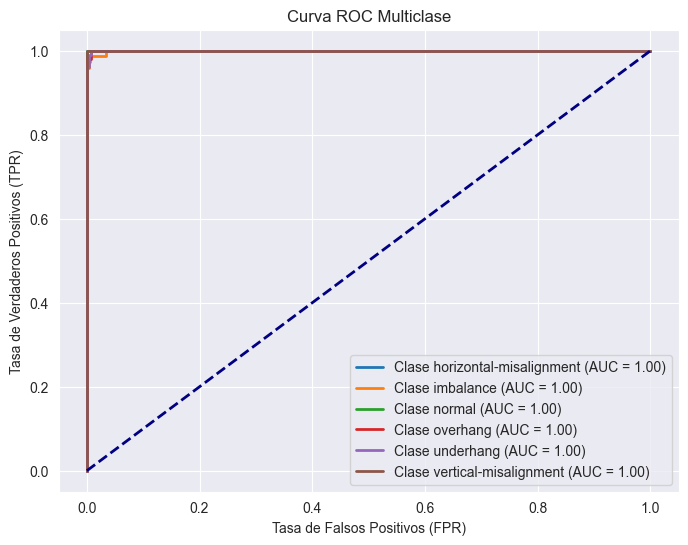

In [24]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones en conjunto de test
rf_test_pred = best_rf.predict(X_test)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, rf_test_pred)

classes = sorted(set(y_test))


# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=classes)
rf_test_prob = best_rf.predict_proba(X_test)

# Graficar la curva ROC para cada clase
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], rf_test_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Clase {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea de referencia
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Multiclase')
plt.legend(loc='lower right')
plt.show()
